In [1]:
# Import Libraries 
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Loading Data
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Removing the "MYOPIC" column from the dataset
myopia_cleaned_df = myopia_df.drop('MYOPIC', axis = 1)
myopia_cleaned_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standardizing the Dataset 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(myopia_cleaned_df[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT',
                                                     'VCD', 'SPORTHR', 'READHR', 'COMPHR',
                                                     'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY',
                                                     'DADMY']])

myopia_data_scaled_df = pd.DataFrame(data_scaled, columns = myopia_cleaned_df.columns)
myopia_data_scaled_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [5]:
# Part 2: Dimensionality Reduction using PCA
pca = PCA(n_components = 0.90)
myopia_pca = pca.fit_transform(myopia_data_scaled_df)
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [6]:
myopia_pca_df = pd.DataFrame(data=myopia_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4",
                                                      "PCA5", "PCA6", "PCA7", "PCA8",
                                                      "PCA9", "PCA10"])
myopia_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [7]:
# Scatter plot of the t-SNE output
labels = myopia_df['MYOPIC']
tsne = TSNE(learning_rate = 35)
tsne_features = tsne.fit_transform(myopia_pca)
tsne_features.shape

(618, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

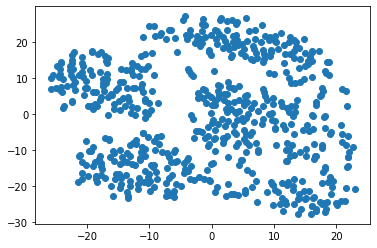

In [8]:
# The first column of transformed features
myopia_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_pca_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'])
plt.show

In [9]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

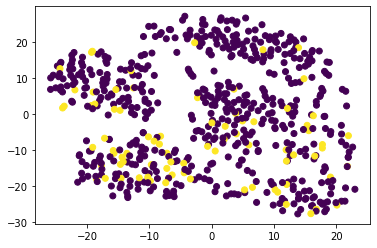

In [10]:
# Visualize the clusters with colors
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=labels)
plt.show

In [11]:
# Part 3: Cluster Analysis with K-means
# Initializing model 
model = KMeans(n_clusters=10, random_state=0)

# Fitting model
model.fit(myopia_pca_df)

# Get predictions
predictions = model.predict(myopia_pca_df)
print(predictions)

# Add a new class column
myopia_pca_df["class"] = model.labels_
myopia_pca_df.head()

[1 2 8 5 7 0 0 3 8 8 4 9 3 8 7 8 8 8 4 8 0 0 0 1 5 3 9 7 2 7 6 9 2 0 7 1 4
 5 0 0 2 8 4 7 6 5 4 5 7 1 2 0 0 6 5 5 9 9 5 0 5 7 8 5 1 7 8 5 8 3 1 9 4 1
 5 6 8 1 0 3 2 0 6 7 0 9 1 9 7 2 8 3 9 5 0 1 5 9 7 8 4 3 5 3 1 5 3 3 2 0 4
 0 9 9 9 2 8 0 2 0 2 3 9 8 4 1 3 6 2 6 6 0 1 8 2 0 8 6 3 5 6 5 2 5 2 9 0 4
 7 1 6 3 1 9 3 3 6 9 7 7 0 0 9 5 7 4 4 0 7 3 9 2 4 3 6 5 7 2 1 7 5 1 3 6 8
 4 6 2 5 2 2 7 9 5 2 5 3 5 2 1 6 3 5 3 8 2 6 5 2 2 1 7 2 2 6 8 1 0 5 1 9 0
 1 3 3 8 4 9 3 5 4 8 7 4 7 2 2 8 8 3 4 6 3 0 6 0 7 6 4 0 8 4 2 4 7 6 6 6 7
 0 4 3 6 9 2 8 2 9 3 0 5 8 8 4 5 6 0 6 1 1 9 4 9 1 9 7 8 1 0 8 3 0 7 3 4 3
 3 0 8 0 3 7 2 4 6 7 4 3 5 4 1 2 0 2 2 2 7 5 2 4 5 2 9 1 2 3 3 2 8 5 0 2 3
 2 2 3 9 7 0 0 8 5 3 6 6 6 6 4 4 5 3 0 2 3 8 5 2 5 1 8 2 9 3 0 0 2 0 5 8 0
 1 8 8 2 1 2 8 3 2 8 1 2 8 5 2 4 3 4 9 4 6 4 8 2 2 3 8 2 5 8 5 0 7 1 4 3 7
 4 8 8 7 6 2 1 0 3 2 5 8 0 2 4 0 6 1 9 8 1 6 5 1 6 3 3 2 4 6 1 2 1 6 2 3 4
 2 0 9 6 3 9 4 4 2 4 3 4 8 0 9 4 2 5 5 2 4 5 2 4 0 7 7 1 8 6 4 7 6 8 3 9 6
 6 9 1 5 2 3 1 9 4 4 3 3 

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,15.564140,-4.589272,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-10.815285,-18.863729,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,6.621870,18.977238,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-23.914707,1.716484,5
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-0.497607,-8.364562,7


In [12]:
# Finding the best value for k using the Elbow Curve
inertia = []
k = list(range(1, 11))

# looking for hte best k
for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)
    
# Define a DataFrame to plot the Elbow Curve using hvplot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


C:\Users\Neel\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,249305.776652
1,2,146288.686126
2,3,96884.919391
3,4,65070.411661
4,5,47868.088331


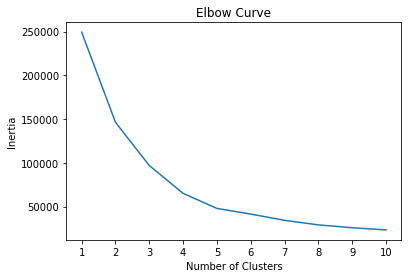

In [13]:
# Plot the elbow curve to find the best candidates for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

In [14]:
# Part 4: Making a Recommendation 
model = KMeans(n_clusters=5, random_state=5)
model.fit(myopia_pca_df)
predictions = model.predict(myopia_pca_df)

In [15]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(myopia_pca_df)

    # Predict clusters
    predictions = model.predict(myopia_pca_df)

    # Create return DataFrame with predicted clusters
    myopia_pca_df["class"] = model.labels_

    return myopia_pca_df

In [16]:
clusters = get_clusters(5, myopia_df)
clusters

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,15.564140,-4.589272,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-10.815285,-18.863729,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,6.621870,18.977238,4
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-23.914707,1.716484,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-0.497607,-8.364562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,16.307940,-0.441368,0
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,-10.242936,-19.044397,2
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,-9.319541,-20.211227,2
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,-1.590433,23.144999,4


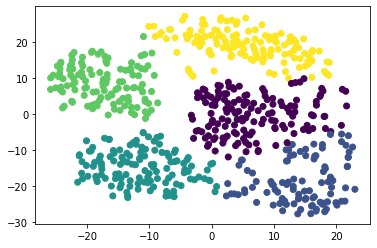

In [17]:
def show_clusters(df):
    plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=myopia_pca_df["class"])
    plt.show()

show_clusters(clusters)

# Patients can be clustered into 5 clusters. 